In [1]:
import tensorflow as tf
import numpy as np
import sys
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
class LinearRegression():
    def __init__(self):
        self.sess = tf.Session()
        
        
    def fit(self, x_train, y_train, batch_size=None, n_inter=10000):
        with tf.variable_scope("linearRegression", reuse=tf.AUTO_REUSE):
            
            if batch_size is None:
                batch_size = x_train.shape[0]
            batch_size = float(batch_size)
            batch_size = tf.get_variable(initializer=tf.constant(batch_size), dtype=tf.float32, name='batch_size')
            
            self.w = tf.get_variable(initializer=tf.random_normal_initializer(), dtype=tf.float32, shape=(1, x_train.shape[1]), name='w')
            self.b = tf.get_variable(initializer=tf.random_normal_initializer(), shape=(), dtype=tf.float32, name='b')
            self.x = tf.placeholder(tf.float32, shape=(None, x_train.shape[1]), name='x')
            
            self.reg = tf.matmul(self.x, tf.transpose(self.w)) + self.b

            
            lr = tf.constant(0.01)
            y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

            res = self.reg - y
            mse = tf.matmul(tf.transpose(res), res)/batch_size
            dJ_dw = tf.matmul(tf.transpose(res), self.x)/batch_size
            new_w = self.w.assign_sub(lr*dJ_dw)
            dJ_db = tf.reduce_mean(res)
            new_b = self.b.assign_sub(lr*dJ_db)
            x_train = scale(x_train)

            self.sess.run(tf.global_variables_initializer())

        for i in range(n_inter):
            y_pred, weight, loss, bias,  = self.sess.run([self.reg, new_w, mse, new_b], feed_dict={self.x: x_train, y: y_train})
            sys.stdout.write(f'\rloss: {loss[0, 0]}')
            sys.stdout.flush()
    
    def predict(self, x_pred):
        y_pred = self.sess.run(self.reg,feed_dict={self.x: x_train})
        return y_pred

In [6]:
l = LinearRegression()

In [7]:
x_train =np.random.randn(10000, 1)
y_train = x_train[:, 0].reshape(-1, 1)
l.fit(x_train, y_train)

loss: 3.4843156138109066e-11

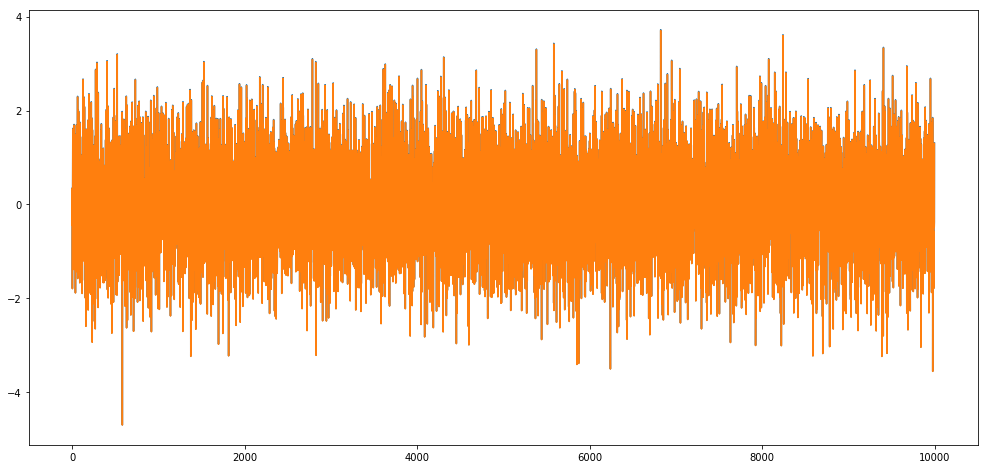

In [8]:
plt.rcParams['figure.figsize'] = (17,8)
plt.plot(l.predict(x_train))
plt.plot(y_train)